# MotoGP
Za projekt pri predmetu Programiranje 1 bom analizirala dirke v zgodovini tekmovanja MotoGP. Podatke sem dobila na strani [Autosport](http://classic.autosport.com/results.php?s=80&y=0&c=0), kjer sem zajela rezultate vseh dirk v kraljevem razredu od začetka tekmovanja, leta 1949, do konca sezone 2016, ter skupne rezultate teh sezon.
## Zajeti podatki
### Rezultati dirk:
- leto
- dirka
- prvi trije in njihovi motocikli

### Skupni rezultati:
- leto
- prvak
- podprvak
- zmagovalno moštvo
- drugo moštvo

## Analiza
Na podlagi rezultatov dirk bom določila dirkače in moštva z največ zmagami (ter drugimi in tretjimi mesti) in na podlagi skupnih rezultatov dirkače in proizvajalce z največ naslovi. Poiskala bom dirkališča, na katerih je potekalo največ dirk in dirkače ter moštva, ki so na njih najboljša. Za konec bom ugotovila, ali je zmagovalec največ dirk v sezoni vedno tudi prvak, oziroma kako pogosto se to zgodi.

In [343]:
import pandas as pd
%matplotlib inline

pd.options.display.max_rows = 20

Poglejmo si tabeli s podatki o dirkah in skupnih rezultatih.

In [344]:
rezultati_dirk = pd.read_csv('csv-datoteke/rezultati_dirk.csv')
rezultati_dirk

,Leto,Dirka,Zmagovalec,Mostvo_zmagovalca,Drugi,Mostvo_drugega,Tretji,Mostvo_tretjega
0,1949,Tourist Trophy,Harold Daniell,Norton,Johnny Lockett,Norton,Ernie Lyons,Velocette
1,1949,Switzerland,Leslie Graham,AJS,Arciso Artesiani,Gilera,Harold Daniell,Norton
2,1949,Netherlands,Nello Pagani,Gilera,Leslie Graham,AJS,Arciso Artesiani,Gilera
3,1949,Belgium,William Doran,AJS,Arciso Artesiani,Gilera,Enrico Lorenzetti,Moto Guzzi
4,1949,Ulster,Leslie Graham,AJS,Artie Bell,Norton,Nello Pagani,Gilera
5,1949,Nations,Nello Pagani,Gilera,Arciso Artesiani,Gilera,William Doran,AJS
6,1950,Tourist Trophy,Geoff Duke,Norton,Artie Bell,Norton,Johnny Lockett,Norton
7,1950,Belgium,Umberto Masetti,Gilera,Nello Pagani,Gilera,Edward Frend,AJS
8,1950,Netherlands,Umberto Masetti,Gilera,Nello Pagani,Gilera,Harry Hinton Sr.,Norton
9,1950,Switzerland,Leslie Graham,AJS,Umberto Masetti,Gilera,Carlo Bandirola,Gilera


In [345]:
skupni_rezultati = pd.read_csv('csv-datoteke/skupni_rezultati.csv',index_col = 'Leto' )
skupni_rezultati

,Prvak,Podprvak,Prvi_proizvajalec,Drugi_proizvajalec
Leto,,,,
1949,Leslie Graham,Nello Pagani,AJS,Gilera
1950,Umberto Masetti,Geoff Duke,Norton,Gilera
1951,Geoff Duke,Alfredo Milani,Norton,Gilera
1952,Umberto Masetti,Leslie Graham,Gilera,Norton
1953,Geoff Duke,Reg Armstrong,Gilera,Norton
1954,Geoff Duke,Ray Amm,Gilera,Norton
1955,Geoff Duke,Reg Armstrong,Gilera,MV Agusta
1956,John Surtees,Walter Zeller,MV Agusta,Gilera
1957,Libero Liberati,Bob McIntyre,Gilera,MV Agusta


### Posamezne zmage
Naredimo tabelo, ki razporedi dirkače glede na največ zmag na posameznih dirkah, iz nje pa je razvidno tudi kolikokrat so bili dirkači drugi in tretji.

In [346]:
najvec_zmag = rezultati_dirk['Zmagovalec'].value_counts()
najvec_drugih = rezultati_dirk['Drugi'].value_counts()
najvec_tretjih = rezultati_dirk['Tretji'].value_counts()

dirkaci = {'1. Zmage': najvec_zmag, '2. Druga mesta': najvec_drugih, '3. Tretja mesta': najvec_tretjih}

tabela_dirkacev = pd.DataFrame(dirkaci).fillna(0).astype(int).sort_values('1. Zmage', ascending = False)
tabela_dirkacev[:20]

,1. Zmage,2. Druga mesta,3. Tretja mesta
Valentino Rossi,88,55,42
Giacomo Agostini,68,20,0
Mick Doohan,54,31,10
Jorge Lorenzo,44,42,21
Casey Stoner,38,11,20
Mike Hailwood,37,9,2
Eddie Lawson,31,31,16
Dani Pedrosa,29,38,36
Marc Marquez,29,15,7
Kevin Schwantz,25,13,13


Po tabeli naredimo graf najuspešnejših desetih dirkačev.

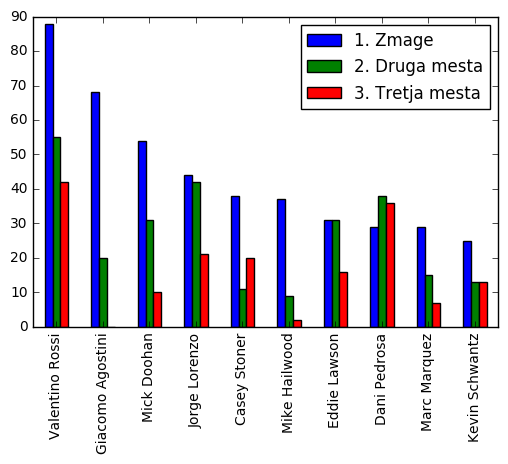

In [347]:
tabela_dirkacev[:10].plot(kind = 'bar')

Poglejmo število zmag, drugih in tretjih mest za posamezna moštva.

In [348]:
mostva_zmage = rezultati_dirk['Mostvo_zmagovalca'].value_counts()
mostva_druga = rezultati_dirk['Mostvo_drugega'].value_counts()
mostva_tretja = rezultati_dirk['Mostvo_tretjega'].value_counts()

dirkaci = {'1. Zmage': mostva_zmage, '2. Druga mesta': mostva_druga, '3. Tretja mesta': mostva_tretja}

tabela_mostev = pd.DataFrame(dirkaci).fillna(0).astype(int).sort_values('1. Zmage', ascending = False)
tabela_mostev[:10]

,1. Zmage,2. Druga mesta,3. Tretja mesta
Honda,279,263,246
Yamaha,222,241,221
MV Agusta,139,52,22
Suzuki,91,91,100
Gilera,35,36,27
Ducati,33,29,43
Norton,21,47,65
AJS,5,7,2
Cagiva,3,4,8
Matchless,3,25,30


### Naslovi
Zanima nas tudi, kateri dirkači so osvojili največ naslovov in podnaslovov.

In [349]:
prvaki = skupni_rezultati['Prvak'].value_counts()
podprvaki = skupni_rezultati['Podprvak'].value_counts()
skupno = {'Naslovi': prvaki, 'Podnaslovi': podprvaki}

tabela_skupno = pd.DataFrame(skupno).fillna(0).astype(int).sort_values('Naslovi', ascending = False)
tabela_skupno[:10]

,Naslovi,Podnaslovi
Giacomo Agostini,8,1
Valentino Rossi,7,5
Mick Doohan,5,2
Mike Hailwood,4,3
Geoff Duke,4,1
John Surtees,4,0
Eddie Lawson,4,1
Marc Marquez,3,0
Kenny Roberts,3,1
Jorge Lorenzo,3,3


Isto naredimo za naslove in podnaslove proizvajalcev.

In [350]:
proizvajalci_naslovi = skupni_rezultati['Prvi_proizvajalec'].value_counts()
proizvajalci_podnaslovi = skupni_rezultati['Drugi_proizvajalec'].value_counts()
skupno = {'Naslovi': proizvajalci_naslovi, 'Podnaslovi': proizvajalci_podnaslovi}

proizvajalci_skupno = pd.DataFrame(skupno).fillna(0).astype(int).sort_values('Naslovi', ascending = False)
proizvajalci_skupno

,Naslovi,Podnaslovi
Honda,22,12
MV Agusta,16,5
Yamaha,14,27
Suzuki,7,4
Gilera,5,5
Norton,2,10
AJS,1,0
Ducati,1,2
Kawasaki,0,1
Linto,0,1


Zanimivo bi bilo videti graf uspešnosti proizvajalcev.

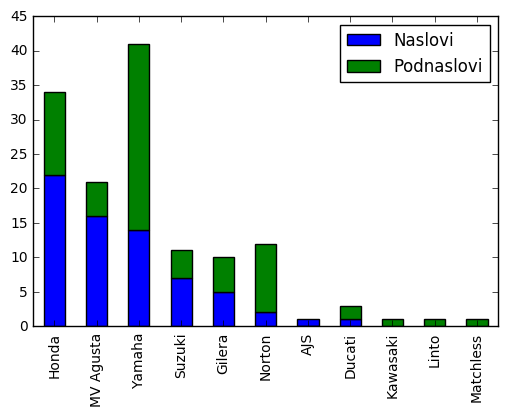

In [351]:
proizvajalci_skupno.plot(kind = 'bar', stacked=True)

### Analiza posameznih dirk
Poglejmo najprej katere dirke so se izvedle največkrat.

In [352]:
najpogostejse_dirke = rezultati_dirk['Dirka'].value_counts()
najpogostejse_dirke[:20]

Netherlands       68
Germany           62
France            53
Spain             49
Belgium           41
Nations           41
Great Britain     40
Japan             30
Tourist Trophy    28
Australia         28
Italy             26
Malaysia          25
Austria           25
Czech Republic    24
Ulster            22
Catalunya         21
Sweden            21
Finland           20
San Marino        19
Valencia          18
Name: Dirka, dtype: int64

Vidimo lahko, da se je število dirk v sezoni s časom povečevalo.

In [353]:
rezultati_dirk['Leto'].value_counts()

2016    18
2014    18
2013    18
2012    18
2010    18
2008    18
2007    18
2015    18
2011    17
2009    17
        ..
1952     8
1953     8
1954     8
1958     7
1959     7
1960     7
1956     6
1957     6
1950     6
1949     6
Name: Leto, dtype: int64

Da bomo imeli lažjo predstavo o porazdelitvi dirk po desetletjih si poglejmo tortni diagram.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0C8B97B0>], dtype=object)

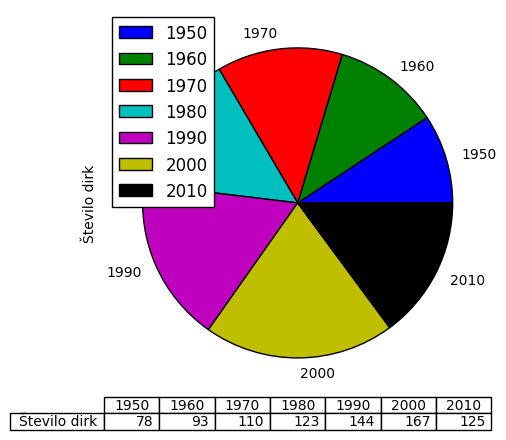

In [354]:
desetletja = {'1950': 0, '1960': 0, '1970': 0, '1980': 0, '1990': 0, '2000': 0, '2010': 0}

for leto in rezultati_dirk['Leto']:
    if leto == 1949 or '195' in str(leto):
        desetletja['1950'] += 1
    elif '196' in str(leto):
        desetletja['1960'] += 1
    elif '197' in str(leto):
        desetletja['1970'] += 1
    elif '198' in str(leto):
        desetletja['1980'] += 1
    elif '199' in str(leto):
        desetletja['1990'] += 1
    elif '200' in str(leto):
        desetletja['2000'] += 1
    else:
        desetletja['2010'] += 1


pd.DataFrame({'Število dirk': desetletja}).plot(kind = 'pie', figsize=(5, 5), subplots= True, table = True)

Za deset najpogosteje izvedenih dirk bomo ugotovili, kateremu dirkaču in kateremu moštvu najbolj ležijo, ter koliko zmag je najboljši dirkač tam dosegel.

In [355]:
dirke = tabela_dirk.axes[0]
dirkaci = tabela_dirkacev.axes[0]
mostva = tabela_mostev.axes[0]

imenik_dirkacev = {}
imenik_mostev = {}
zmage = {}
for dirka in dirke:
    ta_dirka = rezultati_dirk['Dirka'] == dirka
    rez_ta_dirka = rezultati_dirk[ta_dirka]
    imenik_dirkacev[dirka] = rez_ta_dirka['Zmagovalec'].value_counts().idxmax()
    imenik_mostev[dirka] = rez_ta_dirka['Mostvo_zmagovalca'].value_counts().idxmax()
    zmage[dirka] = max(rez_ta_dirka['Zmagovalec'].value_counts())

    
pd.DataFrame({'Število dirk': najpogostejse_dirke[:10], 'Najboljši dirkač': imenik_dirkacev, 
            'Najboljše moštvo': imenik_mostev, 'Št. zmag najboljšega': zmage}).sort_values('Število dirk', ascending=False)

,Najboljše moštvo,Najboljši dirkač,Št. zmag najboljšega,Število dirk
Netherlands,Honda,Valentino Rossi,7,68
Germany,Honda,Giacomo Agostini,8,62
France,Honda,Jorge Lorenzo,5,53
Spain,Honda,Valentino Rossi,7,49
Belgium,MV Agusta,Giacomo Agostini,8,41
Nations,MV Agusta,Giacomo Agostini,6,41
Great Britain,Honda,Valentino Rossi,6,40
Japan,Honda,Kevin Schwantz,4,30
Australia,Honda,Casey Stoner,6,28
Tourist Trophy,MV Agusta,Mike Hailwood,6,28


### Povezava med največ zmagami in naslovom
Naredimo tabelo, ki nam za vsako leto pove, kdo je zmagal največ dirk in kakšen odstotek vseh dirk je to bil.

In [356]:
najvec_zmag = {}
odstotek_zmag = {}
for leto in range(1949, 2017):
    to_leto = rezultati_dirk['Leto'] == leto
    dirke_letos = rezultati_dirk[to_leto]
    najvec_zmag[leto] = dirke_letos['Zmagovalec'].value_counts().idxmax()
    st_zmaganih = max(dirke_letos['Zmagovalec'].value_counts())
    st_vseh = rezultati_dirk['Leto'].value_counts()[leto]
    odstotek_zmag[leto] = round(int(st_zmaganih) / st_vseh.astype(float) * 100, 2)




zmagovalec_leta = pd.DataFrame({'Največ zmag': najvec_zmag, 'Odstotek zmag': odstotek_zmag})
zmagovalec_leta

,Največ zmag,Odstotek zmag
1949,Nello Pagani,33.33
1950,Geoff Duke,50.00
1951,Geoff Duke,50.00
1952,Reg Armstrong,25.00
1953,Geoff Duke,50.00
1954,Geoff Duke,62.50
1955,Geoff Duke,50.00
1956,John Surtees,50.00
1957,Libero Liberati,66.67
1958,John Surtees,85.71


Če te podatke predstavimo z grafom, lahko vidimo, kdaj je imel nek dirkač absolutno premoč in v katerih sezonah je bilo veliko različnih zmagovalcev. Sklepamo lahko, da so bile sezone z nižjimi vrednostmi na grafu, za gledalce bolj zanimive.

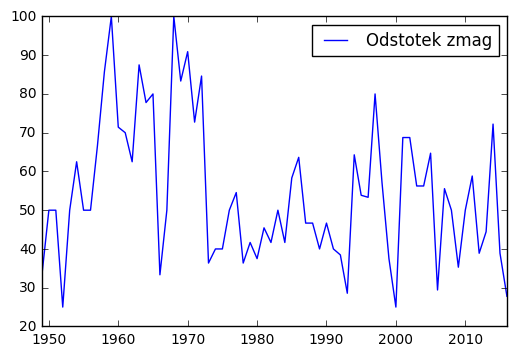

In [357]:
zmagovalec_leta.plot(kind = 'line')

Sedaj pa primerjajmo, kdaj sta si dirkač z največ zmagami in prvak sezone različna.

In [358]:
najvec_zmag = {}
prvak = {}
for leto in range(1949, 2017):
    if zmagovalec_leta['Največ zmag'][leto] != skupni_rezultati['Prvak'][leto]:
        najvec_zmag[leto] = zmagovalec_leta['Največ zmag'][leto]
        prvak[leto] = skupni_rezultati['Prvak'][leto]

tabela_razlik = pd.DataFrame({'Prvak': prvak, 'Največ zmag': najvec_zmag})

Upoštevati moramo, da imata lahko dva dirkača enako število zmag, zato nas tisti, pri katerih sta prvak in "dirkač z največ zmagami" izenačena v številu zmag, ne zanimajo.

In [361]:
sta_izenacena = {}
for leto in tabela_razlik.axes[0]:
    to_leto = rezultati_dirk['Leto'] == leto
    dirke_letos = rezultati_dirk[to_leto]
    st_zmaganih = dirke_letos['Zmagovalec'].value_counts()[tabela_razlik['Prvak'][leto]]
    st_vseh = rezultati_dirk['Leto'].value_counts()[leto]
    odstotek_prvaka = round(int(st_zmaganih) / st_vseh.astype(float) * 100, 2)
    odstotek_najveckrat = zmagovalec_leta['Odstotek zmag'][leto]
    sta_izenacena[leto] = odstotek_prvaka == odstotek_najveckrat

tabela_razlik2 = pd.DataFrame({'Prvak': prvak, 'Največ zmag': najvec_zmag, 'Sta izenačena?': sta_izenacena})
tabela_razlik2

,Največ zmag,Prvak,Sta izenačena?
1949,Nello Pagani,Leslie Graham,True
1950,Geoff Duke,Umberto Masetti,False
1952,Reg Armstrong,Umberto Masetti,True
1966,Mike Hailwood,Giacomo Agostini,True
1967,Mike Hailwood,Giacomo Agostini,True
1983,Kenny Roberts,Freddie Spencer,True
1984,Freddie Spencer,Eddie Lawson,False
1989,Kevin Schwantz,Eddie Lawson,False
1992,Mick Doohan,Wayne Rainey,False
1993,Wayne Rainey,Kevin Schwantz,True


Tako ugotovimo, da je v 68 sezonah tekmovanja, samo sedemkrat naslov osvojil dirkač, ki ni zmagal največ dirk.